<a href="https://colab.research.google.com/github/jogabenn/Actividades-MNA-Inteligencia-Artificial-y-Aprendizaje-Automatico/blob/main/Actividades%20Semana%208/Actividad_de_semana_8_Data_Analysis_with_Python_Modulo_5_Jonathan_Garza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Instituto Tecnológico y de Estudios Superiores de Monterrey**

Maestría en Inteligencia Artificial Aplicada (MNA)

Ciencia y Analítica de Datos

**Actividad de Semana 7: Data Analysis with Python Módulo 5**

**Jonathan Garza Bennet - A01793038**

**Importar Librerías Requeridas**

In [57]:
#Se importan todas las librerías requeridad para los ejercicios

import pandas as pd
import numpy as np
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from tqdm import tqdm
from sklearn.model_selection import GridSearchCV

In [42]:
#Establecer la url de donde se descargará el archivo csv para los ejercicios
path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'

#Descargar el archivo, asignarlo a un dataframe y asignar el nombre deseado de las columnas.
df = pd.read_csv(path)

#Visualizar el encabezado del archivo
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [43]:
#Se tratarán primero sólo valores numéricos
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


**Se definen las fuciones para realizar las gráficas requeridas**

In [44]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

**Parte 1: Entrenando y Probando los Modelos**

In [45]:
#Se selecciona la columna de los datos que se desean predecir y se asignan a una nueva variable
y_data = df['price']

#Se seleccionan los datos de la variable predictora y se asignan a una nueva variable
x_data=df.drop('price',axis=1)

#Se realizan las particiones de entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)

#Se imprime la información de ambas particiones
print("Número de muestras del conjunto de prueba:", x_test.shape[0])
print("Número de muestras del conjunto de entrenamiento:",x_train.shape[0])

#Se llama al modelo de regresión lineal y se asigna a una varible
lre=LinearRegression()

#Se entrena o ajusta al modelo a la variable horsepower
lre.fit(x_train[['horsepower']], y_train)

#Se calcula R^2 para medir el desempeño con el conjunto de prueba
print('R^2 de lre y horsepower para el conjunto de prueba es: {}'.format(lre.score(x_test[['horsepower']], y_test)))

#Se calcula R^2 para medir el desempeño con el conjunto de entrenamiento
print('R^2 de lre y horsepower para el conjunto de entrenamiento es: {}'.format(lre.score(x_train[['horsepower']], y_train)))

Número de muestras del conjunto de prueba: 21
Número de muestras del conjunto de entrenamiento: 180
R^2 de lre y horsepower para el conjunto de prueba es: 0.36358755750788263
R^2 de lre y horsepower para el conjunto de entrenamiento es: 0.6619724197515104


Se observa que R^2 es considerablemente más pequeña usando el conjunto de prueba que el de entrenamiento.

In [46]:
#Se cambia el conjunto de prueba a 40%
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

#Se imprime la información de ambas particiones
print("Número de muestras del conjunto de prueba:", x_test1.shape[0])
print("Número de muestras del conjunto de entrenamiento:",x_train1.shape[0])

#Se calcula R^2 para medir el desempeño con el conjunto de prueba
print('R^2 de lre y horsepower para el conjunto de prueba es: {}'.format(lre.score(x_test1[['horsepower']], y_test1)))

#Se calcula R^2 para medir el desempeño con el conjunto de entrenamiento
print('R^2 de lre y horsepower para el conjunto de entrenamiento es: {}'.format(lre.score(x_train1[['horsepower']], y_train1)))

Número de muestras del conjunto de prueba: 81
Número de muestras del conjunto de entrenamiento: 120
R^2 de lre y horsepower para el conjunto de prueba es: 0.7139364665406973
R^2 de lre y horsepower para el conjunto de entrenamiento es: 0.5754067463583004


Se reduce considerablemente R^2 en el conjunto de entrenamiento pero aumenta en el de prueba.

Si no se tiene un conjunto de datos muy grande, se puede emplear la validación cruzada para mejorar los resultados de entrenamiento.

**Cross-Validation Score**

In [47]:
#Se calcula el valor del ejercicio de validación cruzada con 4 particiones para lre
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

#Se imprime el resultado de R^2 para todas las particiones
print('Los valores de Rcross es: {}'.format(Rcross))

#Se imprime el promedio y la desviación estándar de los resultados
print("El promedio de las particiones es:", Rcross.mean(), "y la desviación estándar es" , Rcross.std())

#Se puede usar el valor negativo de MSE como error:
Rcross_neg = -1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

#Se imprime el resultado de R^2 para todas las particiones
print('El valor de -1*Rcross_neg es: {}'.format(Rcross_neg))

#Se calcula el valor del ejercicio de validación cruzada con 2 particiones para lre
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)

#Se imprime el resultado promedio de R^2 para todas las particiones
print('Los valores de promedio Rc es: {}'.format(Rc.mean()))

#Se pueden realizar el proceso de validación cruzada y las predicciones realizadas por el mismo utilizando la función cross_val_predict
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
print('Los primeros 5 valores predichos son: {}'.format(yhat[0:5]))

Los valores de Rcross es: [0.7746232  0.51716687 0.74785353 0.04839605]
El promedio de las particiones es: 0.522009915042119 y la desviación estándar es 0.291183944475603
El valor de -1*Rcross_neg es: [20254142.84026702 43745493.2650517  12539630.34014931 17561927.72247591]
Los valores de promedio Rc es: 0.5166761697127429
Los primeros 5 valores predichos son: [14141.63807508 14141.63807508 20814.29423473 12745.03562306
 14762.35027598]


**Parte 2: Sobreentrenamiento, Subentrenamiento y Selección de Modelo**

Los primeros 5 valores predichos del conjunto de entrenamiento son:
[ 7426.6731551  28323.75090803 14213.38819709  4052.34146983
 34500.19124244]
Los primeros 5 valores predichos del conjunto de prueba son:
[11349.35089149  5884.11059106 11208.6928275   6641.07786278
 15565.79920282]


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


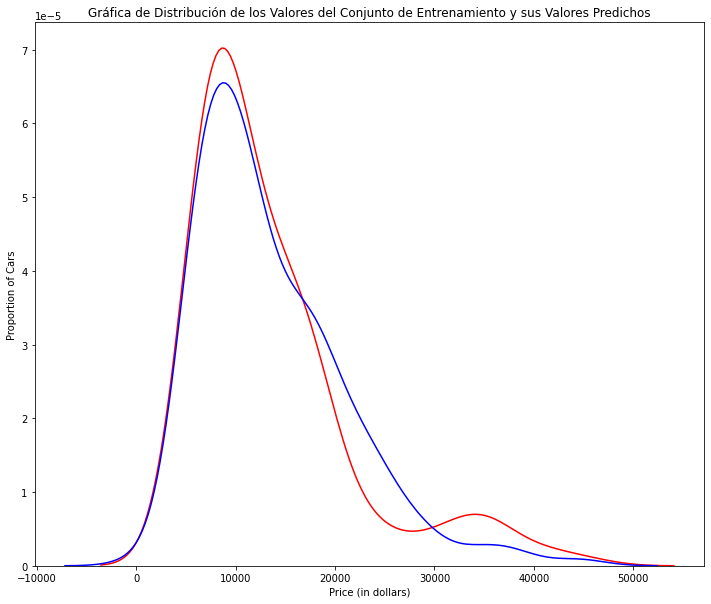

In [48]:
#Se llama al modelo de regresión lineal y se asigna a una varible
lr = LinearRegression()

#Se ajusta el modelo a las columnas 'horsepower', 'curb-weight', 'engine-size' y 'highway-mpg'
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

#Se preciden las variables del conjunto de entrenamiento
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

#Se imprimen los primeros 5 valores del conjunto de entrenamiento
print('Los primeros 5 valores predichos del conjunto de entrenamiento son:\n{}'.format(yhat_train[0:5]))

#Se preciden las variables del conjunto de prueba
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

#Se imprimen los primeros 5 valores del conjunto de prueba
print('Los primeros 5 valores predichos del conjunto de prueba son:\n{}'.format(yhat_test[0:5]))

#Se examina la distribucion de los valores predichos del conjunto de entrenamiento
Title = 'Gráfica de Distribución de los Valores del Conjunto de Entrenamiento y sus Valores Predichos'
DistributionPlot(y_train, yhat_train, "Valores Actuales (Train)", "Valores Predichos (Train)", Title)

El modelo parece estar representando bien a los datos reales en el conjunto de entrenamiento, se procede a estudiar el desempeño con el conjunto de prueba:

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


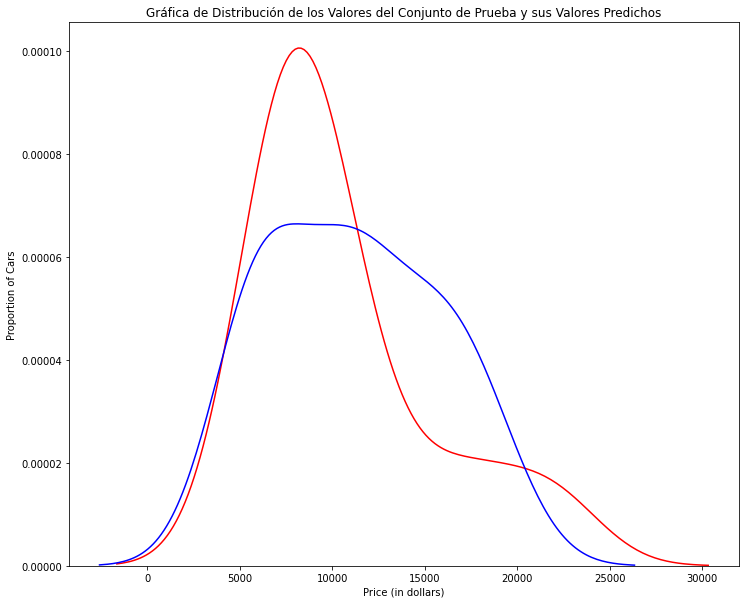

In [49]:
Title = 'Gráfica de Distribución de los Valores del Conjunto de Prueba y sus Valores Predichos'
DistributionPlot(y_test, yhat_test, "Valores Actuales (Test)", "Valores Predichos (Test)", Title)

Se observa que el modelo no está representando de forma tan precisa el conjunto de prueba comparado con el desempeño del conjunto de entrenamiento. Se estudiará si la regresión polinomial presenta un problema similar.

**Sobreentrenamiento**

Los primeros 5 valores predichos del conjunto de entrenamiento son:
[ 6728.65561887  7307.98782321 12213.78770965 18893.24804015
 19995.95195136]
Los primeros 5 valores reales del conjunto de entrenamiento son:
[ 6295. 10698. 13860. 13499. 15750.]


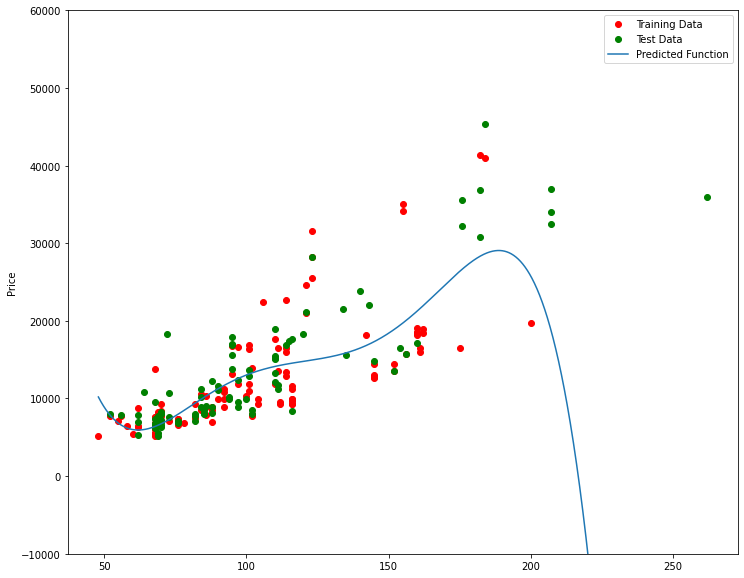

In [50]:
#Para este ejercicio, se utiliza 55% de los datos para entrenamiento y 45% para prueba
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

#Se realiza una transformación polinomial de grado 5 para la variable horsepower
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])

#Se define el modelo de regresión lineal para los coeficientes del polinomio
poly = LinearRegression()

#Se entrena al modelo
poly.fit(x_train_pr, y_train)

#Se realizan las predicciones
yhat = poly.predict(x_test_pr)

#Se imprimen los primeros 5 valores del conjunto de entrenamiento
print('Los primeros 5 valores predichos del conjunto de entrenamiento son:\n{}'.format(yhat[0:5]))

#Se imprimen los primeros 5 valores reales del conjunto de entrenamiento para comparar
print('Los primeros 5 valores reales del conjunto de entrenamiento son:\n{}'.format(y_test[0:5].values))

#Se grafican los resultados con usando la función definida previamente
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

Se observa que la función modela de forma cercana los datos hasta que horsepower es 200; donde empieza a desviarse

In [51]:
#Se calcula R^2 del conjunto de entrenamiento
poly.score(x_train_pr, y_train)

#Se imprime el resultado de R^2 para el conjunto de entrenamiento
print('El valor de R^2 para el conjunto de entrenmiento es: {}'.format(poly.score(x_train_pr, y_train)))

#Se imprime el resultado de R^2 para el conjunto de prueba
print('El valor de R^2 para el conjunto de prueba es: {}'.format(poly.score(x_test_pr, y_test)))

El valor de R^2 para el conjunto de entrenmiento es: 0.556771690212023
El valor de R^2 para el conjunto de prueba es: -29.87134030204415


Se obtuvo un valor negativo de R^2 que corresponde a sobreentrenamiento. A continuación se prueban polinomios de distinto orden y se calcula el valor de R^2:

Text(3, 0.75, 'R^2 Máxima')

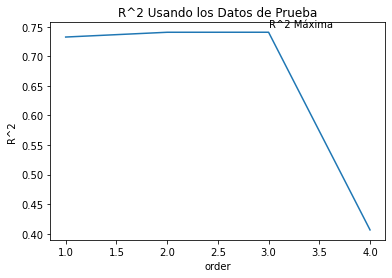

In [52]:
#Se inicia una lista vacía para guardar los resultados de R^2
Rsqu_test = []

#Se establece el orden de los polinomios a probar
order = [1, 2, 3, 4]

#Se inicia el ciclo de los cálculos
for n in order:

    #Se define polinomio de orden n
    pr = PolynomialFeatures(degree=n)
    
    #Se convierten los valores del conjunto de entrenamiento
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    #Se convierten los valores del conjunto de prueba
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    #Se realiza la regresión lineal de los coeficientes
    lr.fit(x_train_pr, y_train)
    
    #Se calcula el valor de R2 y se guardan los resultados en la lista
    Rsqu_test.append(lr.score(x_test_pr, y_test))

#Se grafican los resultados
plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Usando los Datos de Prueba')
plt.text(3, 0.75, 'R^2 Máxima')  

Se observa que el ajuste incrementa gradualmente hasta que se emplea el polinomio de grado 4.

In [53]:
#Se define función para evaluar un polinomio de grado n en la variable horsepower
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

#La siguiente función permite experimentar con polinomios de diferente orden y diferentes particiones en los datos
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

Las dimensiones del conjunto de datos después de la transformación son: (110, 15)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


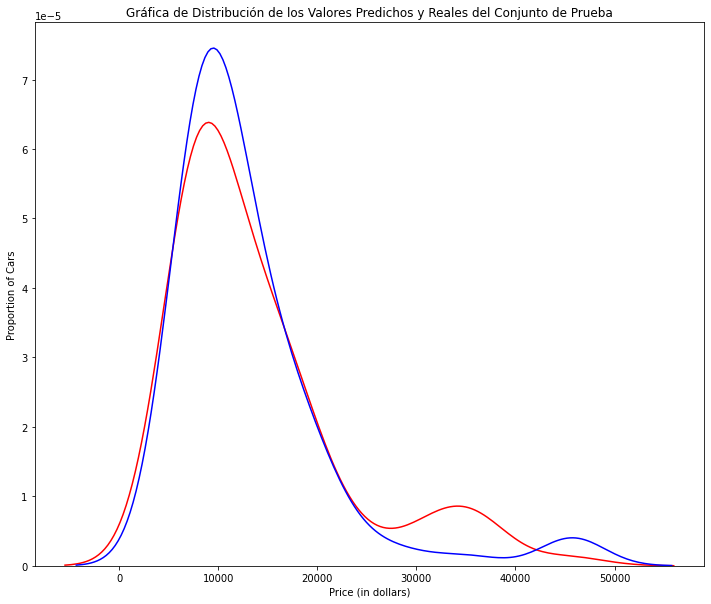

In [54]:
#Se transforman los datos de entrada a un polinomio de grado 2
pr1=PolynomialFeatures(degree=2)

#Transformar a polinomio de grado 2 a los datos del conjunto de entrenamiento
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

#Transformar a polinomio de grado 2 a los datos del conjunto de prueba
x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

#Determinar e imprimir las dimensiones del nuevo conjuntos de datos
print('Las dimensiones del conjunto de datos después de la transformación son: {}'.format(x_train_pr1.shape))

#Se llama y entrena al modelo de regresión lineal
poly1=LinearRegression().fit(x_train_pr1,y_train)

#Se predicen los datos de salida
yhat_test1=poly1.predict(x_test_pr1)

#Se imprimen las gráficas con los resultados
Title='Gráfica de Distribución de los Valores Predichos y Reales del Conjunto de Prueba'
DistributionPlot(y_test, yhat_test1, "Valores Actuales (Test)", "Valores Predichos (Test)", Title)

Se tiene una correlación aceptable entre ambos conjuntos sin embargo, el modelo predice valores más altos que los reales en la región alrededor de los 10000USD y menores en la región alrededor de los 30000 y 40000 USD.

**Parte 3:  Regression Ridge**

Los primeros 5 valores predichos del conjunto de prueba son:
[ 6570.82441941  9636.2489147  20949.92322737 19403.60313256
 21397.69847683]
Los primeros 5 valores reales del conjunto de prueba son:
[ 6295. 10698. 13860. 13499. 15750.]


100%|██████████| 1000/1000 [00:06<00:00, 161.84it/s, Test Score=0.564, Train Score=0.859]


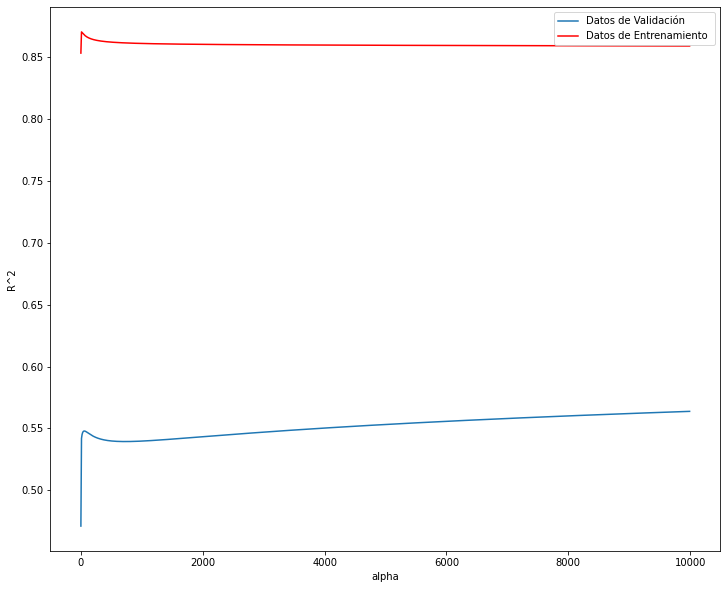

In [55]:
#Función que transforma los datos de entrada a polinomio de grado 2
pr=PolynomialFeatures(degree=2)

#Se transorman los datos de entrenamiento y prueba a polinomio de grado 2
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

#Se crea un objeto de regresión Ridge con penalización alfa de 1
RigeModel=Ridge(alpha=1)

#Se ajustan o entrenan los datos de entrenamiento transformados
RigeModel.fit(x_train_pr, y_train)

#Se realizan las predicciones del conjunto de prueba
yhat = RigeModel.predict(x_test_pr)

#Se imprimen los primeros 4 valores de las predicciones y los valores reales del conjunto de prueba
print('Los primeros 5 valores predichos del conjunto de prueba son:\n{}'.format(yhat[0:5]))
print('Los primeros 5 valores reales del conjunto de prueba son:\n{}'.format(y_test[0:5].values))

#Se inician listas para almacenar datos
Rsqu_test = []
Rsqu_train = []
dummy1 = []

#Se crea una lista con incrementos de alfa
Alpha = 10 * np.array(range(0,1000))

#Se inicia la barra de progreso con los valores de Alpha
pbar = tqdm(Alpha)

#Se inicia el ciclo para entrenar el modelo Ridge con todos los valores de Alfa
for alpha in pbar:

    #Modelo Ridge con Alfa variable
    RigeModel = Ridge(alpha=alpha) 

    #Se entrena el modelo
    RigeModel.fit(x_train_pr, y_train)

    #Se calcula y almacena R^2 para ambos conjuntos en variables temporales
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    #Se despliegan los valores de la barrar de progreso
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    #Se guardan los resultados de ambos conjuntos
    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

#Dimensiones de la gráfica
width = 12
height = 10
plt.figure(figsize=(width, height))

#Se realiza la grafican todos los resultados al variar alfa
plt.plot(Alpha,Rsqu_test, label='Datos de Validación ')
plt.plot(Alpha,Rsqu_train, 'r', label='Datos de Entrenamiento ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

Entre más incrementa alfa, más se penaliza la magnitud de los coeficientes de polinomio y por lo tanto se reduce su correlación con los datos de entrenamiento, lo contrario ocurre con los resultados del conjunto de prueba.

In [56]:
#Modelo Ridge con alfa 10, se ajusta y se calcula su correlación
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206702

**Parte 4: GridSearch**

In [68]:
#Se crea un diccionario con el conjunto de valores alfa para la búsqueda
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
print('Los valores de búsqueda de alfa son:\n{}'.format(parameters1))

#Objeto asignado a una regresión Ridge
RR=Ridge()

#Objeto asignado a Grid Search con 4 particiones de validación cruzada
Grid1 = GridSearchCV(RR, parameters1,cv=4)

#Se realiza la búsqueda de malla
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

#Se guarda el estimador en un nuevo objeto
BestRR=Grid1.best_estimator_

#Se despliega el mejor estimador encontrado
print('El mejor estimador Ridge es: {}'.format(BestRR))

#Se realiza el cálculo de R^2 con el mejor estimador en el conjuntos de prueba
print('R^2 con el mejor estimador Ridge es: {}'.format(BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)))

Los valores de búsqueda de alfa son:
[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]
El mejor estimador Ridge es: Ridge(alpha=10000)
R^2 con el mejor estimador Ridge es: 0.8411649831036151
